In [16]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from citipy import citipy
from datetime import datetime
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2f65df95df2a32f60e3fb1a5e3604bb


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# coordinates

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # print(f"{i} {city}")
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nizwa
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | vicuna
Processing Record 4 of Set 1 | ilo
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | zhanakorgan
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | coro
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | beisfjord
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | nishihara
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 | oranjemund
Proce

Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | moindou
Processing Record 44 of Set 4 | mezen
Processing Record 45 of Set 4 | neiafu
Processing Record 46 of Set 4 | primorsk
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | tulagi
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | neka
Processing Record 2 of Set 5 | tarudant
City not found. Skipping...
Processing Record 3 of Set 5 | ushirombo
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | amposta
Processing Record 6 of Set 5 | fort nelson
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | kenai
Processing Record 9 of Set 5 | pevek
Processing Record 10 of Set 5 | saldanha
Processing Record 11 of Set 5 | richards bay
Processing Record 12 of Set 5 | east london
Processing Record 13 of Set 5 | yulara
Processing Record 14 of Set 5 | san andres
Proc

Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | buraydah
Processing Record 37 of Set 8 | ekhabi
Processing Record 38 of Set 8 | zhezkazgan
Processing Record 39 of Set 8 | ojinaga
Processing Record 40 of Set 8 | atambua
Processing Record 41 of Set 8 | verkh-usugli
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | kochki
Processing Record 44 of Set 8 | beroroha
Processing Record 45 of Set 8 | gwadar
Processing Record 46 of Set 8 | ust-kuyga
Processing Record 47 of Set 8 | tarauaca
Processing Record 48 of Set 8 | grand forks
Processing Record 49 of Set 8 | borazjan
Processing Record 50 of Set 8 | rach gia
Processing Record 1 of Set 9 | pitimbu
Processing Record 2 of Set 9 | gari
Processing Record 3 of Set 9 | ambon
Processing Record 4 of Set 9 | cusuna
Processing Record 5 of Set 9 | viking
Processing Record 6 of Set 9 | dingle
Processing Record 7 of Set 9 | wakkanai
Processing Record 8 of Set 9 | lav

Processing Record 26 of Set 12 | karymskoye
Processing Record 27 of Set 12 | baie-saint-paul
Processing Record 28 of Set 12 | maghama
City not found. Skipping...
Processing Record 29 of Set 12 | omsukchan
Processing Record 30 of Set 12 | kautokeino
Processing Record 31 of Set 12 | camapua
Processing Record 32 of Set 12 | kailua
Processing Record 33 of Set 12 | nguiu
City not found. Skipping...
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | waiuku
Processing Record 36 of Set 12 | grindavik
Processing Record 37 of Set 12 | atar
Processing Record 38 of Set 12 | xudat
Processing Record 39 of Set 12 | kota bahru
Processing Record 40 of Set 12 | qasigiannguit
Processing Record 41 of Set 12 | tapaua
City not found. Skipping...
Processing Record 42 of Set 12 | kendari
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
print(f"len of city_data: {len(city_data)}")

len of city_data: 557


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nizwa,22.93,57.53,86.65,39,31,0.94,OM,2020-06-17 00:10:22
1,Yellowknife,62.46,-114.35,64.40,45,20,16.11,CA,2020-06-17 00:08:48
2,Vicuna,-30.03,-70.71,46.99,62,17,1.99,CL,2020-06-17 00:10:22
3,Ilo,-17.64,-71.34,62.51,82,47,6.87,PE,2020-06-17 00:05:43
4,Nuuk,64.18,-51.72,35.60,87,96,14.99,GL,2020-06-17 00:10:23


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nizwa,OM,2020-06-17 00:10:22,22.93,57.53,86.65,39,31,0.94
1,Yellowknife,CA,2020-06-17 00:08:48,62.46,-114.35,64.40,45,20,16.11
2,Vicuna,CL,2020-06-17 00:10:22,-30.03,-70.71,46.99,62,17,1.99
3,Ilo,PE,2020-06-17 00:05:43,-17.64,-71.34,62.51,82,47,6.87
4,Nuuk,GL,2020-06-17 00:10:23,64.18,-51.72,35.60,87,96,14.99


In [11]:
# Create the output file (CSV).
output_data_file  = os.path.join(".","weather_data", "cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Get today's date in seconds.
today = time.time()
today

1592352755.2735214

In [14]:
today = time.strftime('%x')
today

'06/16/20'

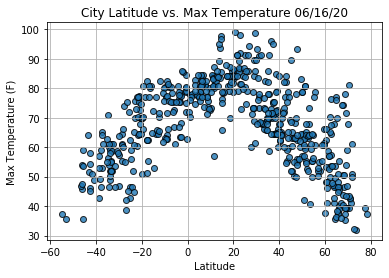

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig1.png")
plt.savefig(file_name)

# Show plot.
plt.show()

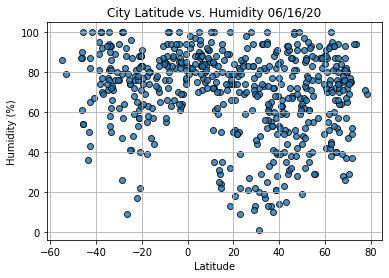

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
file_name = os.path.join(".", "weather_data", "Fig2.png")
plt.savefig(file_name)

# Show plot.
plt.show()

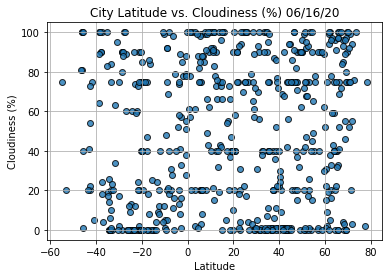

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
file_name = os.path.join(".", "weather_data", "Fig3.png")
plt.savefig(file_name)
# Show plot.
plt.show()